In [1]:
setwd('c:/Users/ricta/Documents/PerCoolAction/XY model')
Temperature <- seq(2, 2.4, 0.025)
N <- 400
folder <- 'res/'
file_path_U <- paste(folder, 'U_', N, '.txt', sep="")
file_path_c <- paste(folder, 'c_', N, '.txt', sep="")

In [2]:
U_400 = read.table(file_path_U, header = FALSE, col.names = "U")[[1]]
C_400 = read.table(file_path_c, header = FALSE, col.names = "c")[[1]]
U_200 = read.table(paste(folder, 'U_', 200, '.txt', sep=""), header = FALSE, col.names = "U")[[1]]
U_100 = read.table(paste(folder, 'U_', 100, '.txt', sep=""), header = FALSE, col.names = "U")[[1]]

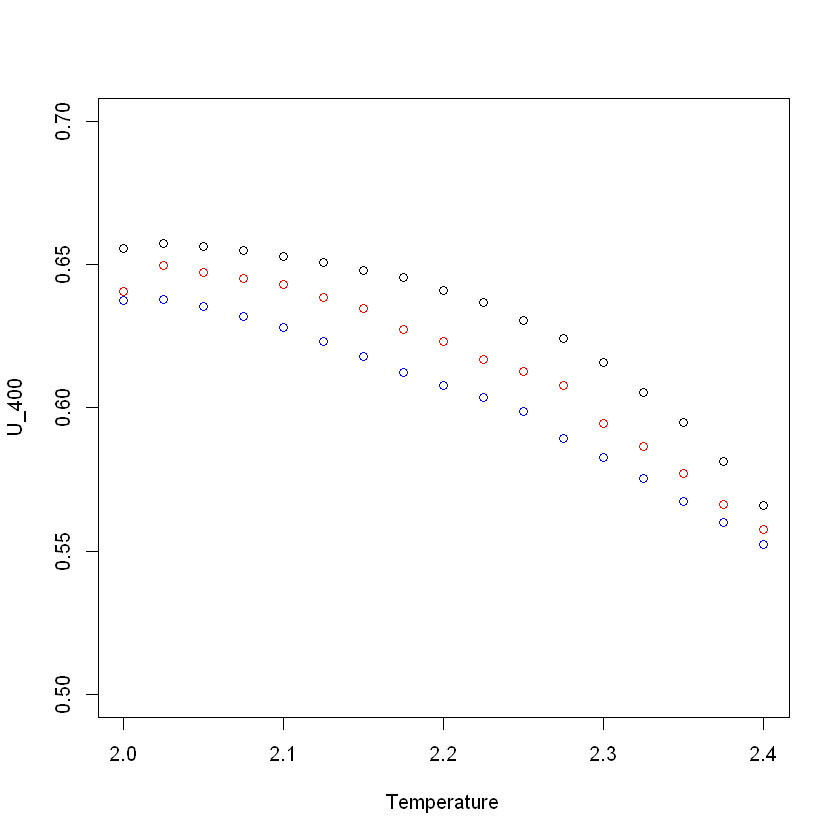

In [3]:
plot(Temperature, U_400, ylim=c(0.5, 0.7), col="black")
points(Temperature, U_200, col="red")
points(Temperature, U_100, col="blue")

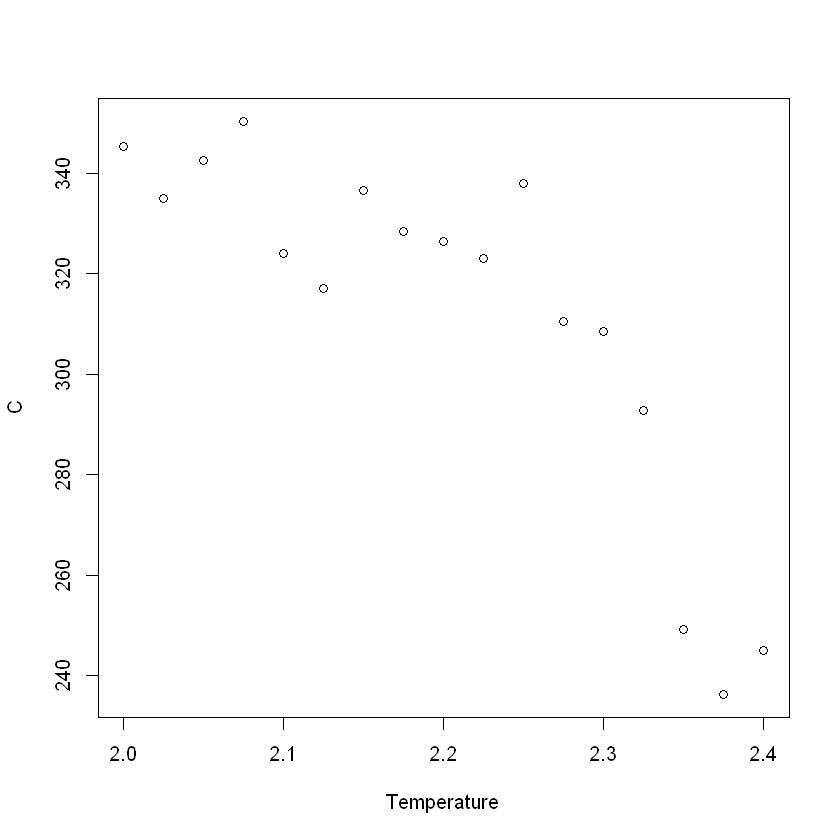

In [5]:
plot(Temperature, C/N)